## **Simple Chess Evaluation Function**
Dylan Herrera \
Uses NN architecture from this [paper](https://www.ai.rug.nl/~mwiering/GROUP/ARTICLES/ICPRAM_CHESS_DNN_2018.pdf)

In [1]:
!pip install numpy==1.16.2
import tensorflow as tf
from tensorflow import keras as ks
import pandas as pd
import numpy as np
from google.colab import drive

In [0]:
#drive.mount('/content/drive')

In [0]:
with open('/content/drive/My Drive/Colab Notebooks/Chess/data/scores.npy', 'rb') as f:
  scores = np.load(f)

In [0]:
with open('/content/drive/My Drive/Colab Notebooks/Chess/data/positions.npy', 'rb') as f: 
  positions = np.load(f)

In [0]:
from sklearn.model_selection import train_test_split
X = np.array(positions)
Y = np.array(scores)+10
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [0]:
model = ks.Sequential([
    ks.layers.Flatten(input_shape=(64, 12)),
    ks.layers.Dense(768, activation=tf.nn.relu),
    ks.layers.Dropout(.2),
    ks.layers.Dense(1048, activation=tf.nn.relu),
    ks.layers.Dropout(.2),
    ks.layers.Dense(500, activation=tf.nn.relu),
    ks.layers.Dropout(.2),
    ks.layers.Dense(50, activation=tf.nn.relu),
    ks.layers.Dropout(.2),
    ks.layers.Dense(21, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
history = model.fit(X_train,Y_train, epochs=15, batch_size = 256, validation_split = .2)

Epoch 1/15
287/287 [==============================] - 21s 75ms/step - loss: 1.1406 - accuracy: 0.6727 - val_loss: 0.8935 - val_accuracy: 0.7659
Epoch 2/15
287/287 [==============================] - 21s 74ms/step - loss: 0.8267 - accuracy: 0.7959 - val_loss: 0.7821 - val_accuracy: 0.8056
Epoch 3/15
287/287 [==============================] - 21s 75ms/step - loss: 0.7039 - accuracy: 0.8306 - val_loss: 0.7602 - val_accuracy: 0.8175
Epoch 4/15
287/287 [==============================] - 21s 75ms/step - loss: 0.6352 - accuracy: 0.8458 - val_loss: 0.7417 - val_accuracy: 0.8223
Epoch 5/15
287/287 [==============================] - 21s 73ms/step - loss: 0.5832 - accuracy: 0.8557 - val_loss: 0.7488 - val_accuracy: 0.8296
Epoch 6/15
287/287 [==============================] - 21s 73ms/step - loss: 0.5464 - accuracy: 0.8620 - val_loss: 0.7677 - val_accuracy: 0.8323
Epoch 7/15
287/287 [==============================] - 21s 73ms/step - loss: 0.5131 - accuracy: 0.8682 - val_loss: 0.7870 - val_accuracy:

In [8]:
predictions = model.evaluate(X_test, Y_test)

956/956 [==============================] - 6s 6ms/step - loss: 0.9187 - accuracy: 0.8273


In [9]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


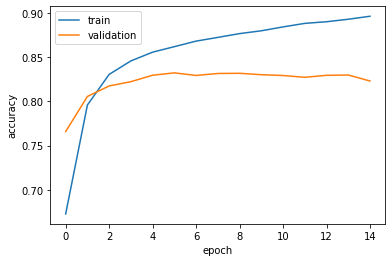

In [10]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'], loc='upper left')

In [11]:
model.save('/content/drive/My Drive/Colab Notebooks/Chess/model', save_format=tf)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Chess/model/assets
